# ISAT json tools
Functions to manipulate ISAT json files

In [1]:
%cd ..

c:\Users\Charl\OneDrive\Academics\2023 ETH\Projects\PhD thesis\StomataPy


### Organize json files

### Sort and group

In [1]:
%cd ..

c:\Users\zhongyua\OneDrive\Academics\2023 ETH\Projects\PhD thesis\StomataPy


In [2]:
from stomatapy.core.isat import UtilsISAT

# input_dir = 'Datasets/Koheler2023/Processed/Z. mays/Annotated'
# input_dir = 'Datasets/Pathoumthong2023/Processed/T. aestivum'
input_dir = 'Datasets/Ferguson2021/Processed/S. bicolor/Annotated'
# input_dir = 'Datasets/Meeus2020/Processed/G. max/Annotated'

# input_dir = 'Datasets/Sun2021/Processed/T. aestivum/Unlabeled'

input_dir = 'Datasets/Koheler2024/Processed/T. aestivum/'
UtilsISAT.quality_check(input_dir)
UtilsISAT.sort_group(input_dir, if2rgb=False)
UtilsISAT.shapely_valid_transform(input_dir)
UtilsISAT.group_annotated(json_dir=input_dir)

In [2]:
import os
from stomatapy.core.isat import UtilsISAT
root = 'Datasets/Li2022/Processed/'
for subfolder in os.listdir(root):
    input_dir = os.path.join(root, subfolder)
    UtilsISAT.quality_check(input_dir)
    UtilsISAT.sort_group(input_dir, if2rgb=True)
    UtilsISAT.shapely_valid_transform(input_dir)
    # UtilsISAT.group_annotated(json_dir=input_dir)

converted Datasets/Li2022/Processed/A. thaliana\A. thaliana Li2022 F5_E_training_data sample 0.png to RGB
converted Datasets/Li2022/Processed/A. thaliana\A. thaliana Li2022 F5_E_training_data sample 1.png to RGB
converted Datasets/Li2022/Processed/A. thaliana\A. thaliana Li2022 F5_E_training_data sample 2.png to RGB
converted Datasets/Li2022/Processed/A. thaliana\A. thaliana Li2022 F5_E_training_data sample 3.png to RGB
converted Datasets/Li2022/Processed/A. thaliana\A. thaliana Li2022 F5_E_training_data sample 4.png to RGB
converted Datasets/Li2022/Processed/A. thaliana\A. thaliana Li2022 F5_E_training_data sample 5.png to RGB
converted Datasets/Li2022/Processed/A. thaliana\A. thaliana Li2022 F5_FGH sample 0.png to RGB
converted Datasets/Li2022/Processed/N. tabacum\N. tabacum Li2022 F5_ABC sample 0.png to RGB
converted Datasets/Li2022/Processed/N. tabacum\N. tabacum Li2022 F5_ABC sample 1.png to RGB
converted Datasets/Li2022/Processed/N. tabacum\N. tabacum Li2022 F5_ABC sample 10.png 

### Select jsons

In [1]:
from stomatapy.data_engine.data4training import Data4Stomata


sampled_jsons = Data4Stomata.find_similary_jsons(datasets_root='Datasets', sample_size=1)

c:\Users\zhongyua\OneDrive\Academics\2023 ETH\Projects\PhD thesis\StomataPy\stomatapy\utils\data_statistics.py:149: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([result])], axis=0)  # concatenate all results


Total masks: 124889, 71578 (57.31 %) out of which is autolabeled
Category counts: {'stoma': 40274, 'stomatal complex': 43674, 'pavement cell': 32920, 'outer ledge': 5639, 'pore': 2382}
slected datasets: ['Fetter2019 - C. latifolia', 'Fetter2019 - P. borbonia', 'Fetter2019 - I. floridum', 'Fetter2019 - I. floridum', 'Fetter2019 - C. crinita', 'Fetter2019 - C. crinita', 'Fetter2019 - C. crinita', 'Fetter2019 - R. cubana', 'Fetter2019 - O. veraguensis', 'Vofely2019 - G. odoratum', 'Vofely2019 - G. odoratum', 'Vofely2019 - G. odoratum', 'Vofely2019 - G. odoratum', 'Vofely2019 - G. odoratum', 'Fetter2019 - R. montana', 'Fetter2019 - H. speciosa', 'Fetter2019 - C. sicyoides', 'Fetter2019 - Q. laevis', 'Fetter2019 - O. bracteosa', 'Vofely2019 - A. carmichaelii', 'Vofely2019 - A. carmichaelii', 'Vofely2019 - A. carmichaelii', 'Vofely2019 - A. carmichaelii', 'Vofely2019 - B. suaveolens', 'Vofely2019 - B. suaveolens', 'Fetter2019 - S. viciiflora', 'Fetter2019 - S. rosei', 'Fetter2019 - Q. acaten

100%|██████████| 350/350 [03:21<00:00,  1.74it/s]


In [11]:
import torch

sampled_jsons = torch.load('Datasets//extracted_features.pth')

In [ ]:
from stomatapy.data_engine.feature_clustering import FeatureClustering
test = FeatureClustering.cluster_images_hdbscan(sampled_jsons, min_cluster_size=20, min_samples=1, n_show=10)

In [12]:
all_features, all_image_paths, dataset_keys = [], [], []  # Keep track of the dataset each image belongs to

for dataset_species, metadata_list in sampled_jsons.items():
            for metadata in metadata_list:
                all_features.append(metadata['image_features'])
                all_image_paths.append(metadata['image_path'])
                dataset_keys.append(dataset_species)  # repeat dir_key for each image

In [35]:
import os
import numpy as np


def compute_similarity_matrix(features: np.ndarray) -> dict:
        """ Compute the similarity matrix from the extracted features """
        features_norm = np.stack(features) / np.linalg.norm(features, axis=1, keepdims=True)  # normalize the feature vectors to unit length
        similarity_matrix = np.dot(features_norm, features_norm.T)  # compute pairwise cosine similarity
        return similarity_matrix
    
def compute_single_image_similarity(target_image_index: int, features: np.ndarray) -> np.ndarray:
    """ Compute the similarity of one image against all others """
    features_norm = np.stack(features) / np.linalg.norm(features, axis=1, keepdims=True)  # normalize the feature vectors to unit length
    target_feature_norm = features_norm[target_image_index]  # extract and normalize the target feature vector
    similarity_vector = np.dot(features_norm, target_feature_norm)  # compute the similarity with all other images
    return similarity_vector

target_image_index = 35  # index of the target image
similarity_vector = compute_single_image_similarity(target_image_index, all_features)

In [ ]:
for idx, image_path in enumerate(dataset_keys):
    print(f'idex {idx}: {os.path.basename(image_path)}')

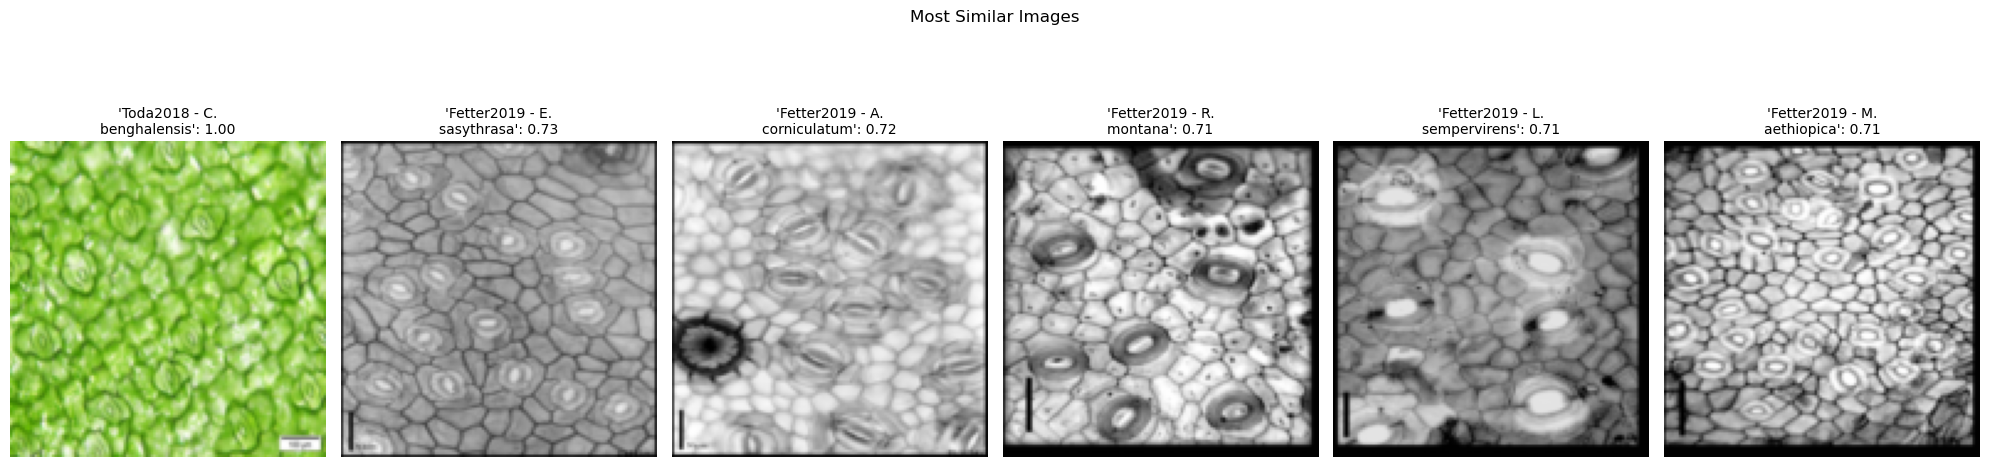

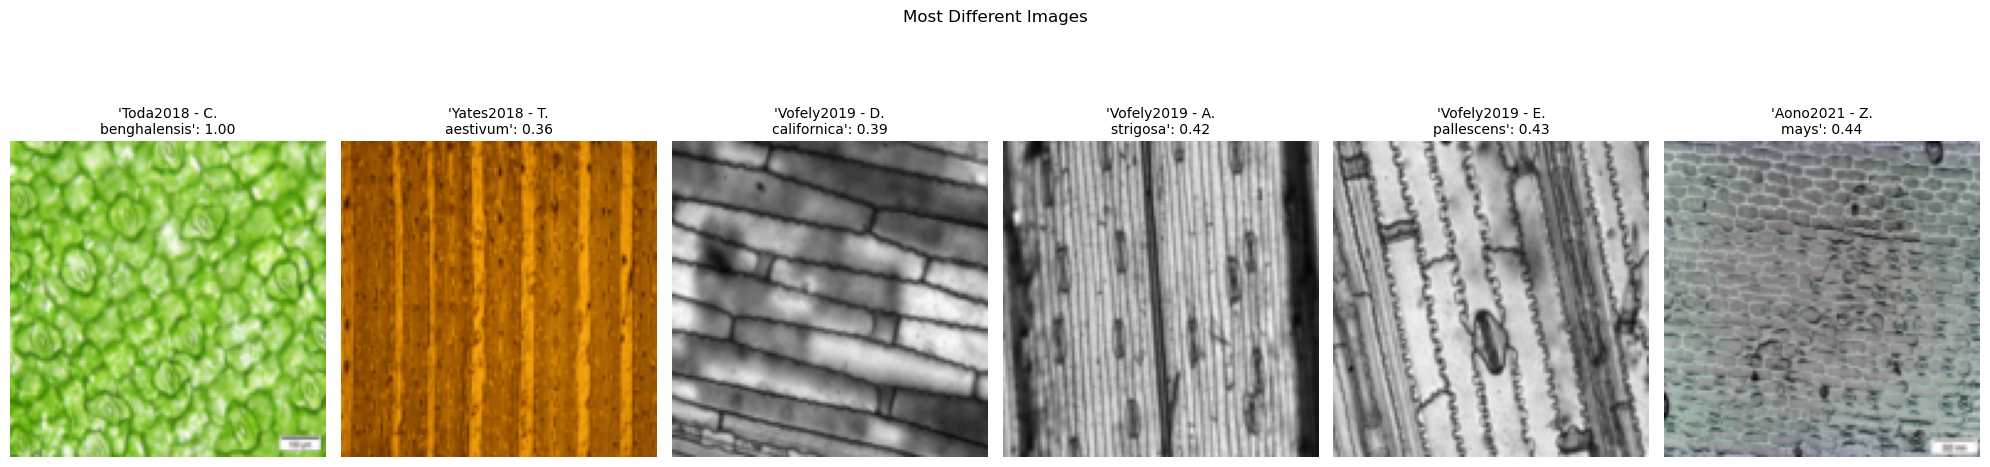

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from skimage.transform import resize
import textwrap

def plot_images_with_titles(indices, similarity_vector, all_image_paths, dataset_keys, title, n, image_size=(128, 128), filename=None):
    fig, axes = plt.subplots(1, n + 1, figsize=(20, 5))
    for i, idx in enumerate(indices):
        ax = axes[i]
        image = imread(all_image_paths[idx])
        image_resized = resize(image, image_size, anti_aliasing=True)
        ax.imshow(image_resized)
        title_text = f"'{os.path.basename(dataset_keys[idx])}': {similarity_vector[idx]:.2f}"
        wrapped_title = "\n".join(textwrap.wrap(title_text, width=20))  # Adjust width as needed
        ax.set_title(wrapped_title, fontsize=10)
        ax.axis('off')
    
    fig.suptitle(title, y=1.05)  # Adjust the y position of the suptitle
    plt.subplots_adjust(top=0.85)  # Adjust the top space to reduce the empty space
    plt.tight_layout()
    
    if filename:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()

def plot_most_similar_and_different_images(n: int, similarity_vector: np.ndarray, all_image_paths: list, dataset_keys: list, target_image_index: int, image_size=(128, 128)):
    # Sort indices based on similarity
    sorted_indices = np.argsort(similarity_vector)
    
    # Get the top n most similar and n most different images
    most_similar_indices = sorted_indices[-(n+1):][::-1].tolist()  # last n+1 indices (excluding the target image itself)
    most_different_indices = sorted_indices[:n].tolist()  # first n indices
    
    # Remove the target image from the most similar indices if it exists
    most_similar_indices = [idx for idx in most_similar_indices if idx != target_image_index][:n]
    
    # Insert the target image at the beginning of the list for both similar and different images
    most_similar_indices.insert(0, target_image_index)
    most_different_indices.insert(0, target_image_index)
    
    # Plot the most similar images and save the plot
    plot_images_with_titles(most_similar_indices, similarity_vector, all_image_paths, dataset_keys, 'Most Similar Images', n, image_size, 'most_similar_images.png')
    
    # Plot the most different images and save the plot
    plot_images_with_titles(most_different_indices, similarity_vector, all_image_paths, dataset_keys, 'Most Different Images', n, image_size, 'most_different_images.png')

# Example usage
n = 5  # Number of most similar and most different images to plot
target_image_index = 51  # Index of the target image

# Compute the similarity of the target image against all others
similarity_vector = compute_single_image_similarity(target_image_index, all_features)

# Plot the most similar and most different images
plot_most_similar_and_different_images(n, similarity_vector, all_image_paths, dataset_keys, target_image_index)


### Summarize all valid annotations

In [1]:
import os
from stomatapy.core.isat import UtilsISAT
root = 'Datasets//Fetter2019//Processed'
for subfolder in os.listdir(root):
    input_dir = os.path.join(root, subfolder)
    UtilsISAT.quality_check(input_dir)
    UtilsISAT.sort_group(input_dir, if2rgb=False)

In [1]:
from stomatapy.data_engine.data_statistics import DataStatistics
DataStatistics(root_dir='Datasets').get_info()

Total masks: 492329
Category counts: {'stoma': 42676, 'pavement cell': 32870, 'stomatal complex': 43592, 'outer ledge': 5639, 'pore': 2382}


### Annotations quality check and sorting

In [7]:
import os
import glob
input_dir = 'Datasets//2018 Yates et al//Processed//T. aestivum//'
json_paths = glob.glob(os.path.join(input_dir, f"*{'.json'}"))
for json_path in json_paths:
    if os.path.exists(json_path.replace('.json', '.jpg')):
        pass
    else:
        os.remove(json_path)
    

In [6]:
import os
from stomatapy.core.isat import UtilsISAT
root = 'Datasets//2020 Casado-Garcia et al//Processed'
for subfolder in os.listdir(root):
    input_dir = os.path.join(root, subfolder)
    UtilsISAT.quality_check(input_dir)
    UtilsISAT.sort_group(input_dir, if2rgb=False)
    UtilsISAT.group_annotated(json_dir=input_dir)

### Daw bboxes on images (make a copy first)

In [2]:
from stomatapy.data_engine.data_engine import StomataPyData
input_dir = 'Datasets//2020 Casado-Garcia et al//Processed//P. vulgaris - Copy'
StomataPyData.draw_xml_bbox(input_dir=input_dir, image_extension='.jpg')

In [5]:
from stomatapy.core.isat import UtilsISAT
input_dir = 'Datasets//2020 Casado-Garcia et al//Processed//G. Max//'
UtilsISAT.quality_check(input_dir)
UtilsISAT.sort_group(json_dir=input_dir)
#UtilsISAT.group_annotated(json_dir=input_dir)

In [3]:
from PIL import Image
import os

def process_and_replace_images(folder_path):
    # Iterate through all files in the folder
    for file_name in os.listdir(folder_path):
        # Construct full file path
        file_path = os.path.join(folder_path, file_name)
        
        # Check if the file is an image (you might want to add other extensions)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            try:
                # Load the image
                with Image.open(file_path) as img:
                    # Process the image if needed (e.g., resize, rotate, filter)
                    # For example, to convert to grayscale you can uncomment the next line
                    # img = img.convert('L')

                    # Save the image back to the same location, replacing the original
                    img.save(file_path.replace('.jpg', '.png'))
                    
            except Exception as e:
                print(f"Failed to process image {file_path}: {e}")


input_dir = 'Datasets//2020 Casado-Garcia et al//Processed//G. Max//Annotated - Copy'
# Replace 'your_folder_path' with the path to your images folder
process_and_replace_images(input_dir)


### Cellpose <-> ISAT

In [1]:
from stomatapy.core.isat import UtilsISAT
UtilsISAT.objects_filter(json_dir='Datasets//2018 Yates et al//Processed//T. aestivum//Batch 1', ellipse_threshold=0.9, area_threshold=3500)

 50%|█████     | 51/102 [12:23<13:17, 15.64s/it]

In [1]:
from stomatapy.core.isat import UtilsISAT
UtilsISAT.select_class(json_dir='Datasets//2018 Yates et al//Processed//T. aestivum//Batch 1', category='stomatal complex', action='remove')

In [1]:
from stomatapy.data_engine.cellpose2 import CellPose

#train_dir = 'Datasets//2018 Yates et al//Processed//T. aestivum'
#inference_dir = 'Datasets//2018 Yates et al//Processed//T. aestivum//Batch 1'

train_dir = 'Datasets//Yates2018//Processed//T. aestivum'
inference_dir = 'Datasets//Yates2018//Original - Copy//ZENODO_pictures_2014'

init_cellpose = CellPose(
        train_dir=train_dir,
        inference_dir=inference_dir,
        test_dir=None,
        model_name='yates',  # yates
        initial_model='general',
        n_epochs=600,
        nimg_per_epoch=20,
        channel_one=0,
        channel_two=0,
        learning_rate=0.01,
        weight_decay=0.0001,
        flow_threshold=0.4,
        cellprob_threshold=0,
        inference_batch_size=40,
        annnotation_category='stomatal complex')  # stomatal complex

In [ ]:
init_cellpose.training(isat2cellpose=True)

In [ ]:
model_path = 'Datasets//Yates2018//Processed//T. aestivum///models//yates'
# model_path = 'Datasets//2020 Casado-Garcia et al//Processed//G. Max//models//gmax'
init_cellpose.inference(model_path, cellpose2isat=True)

In [2]:
from stomatapy.core.isat import Anything2ISAT
from stomatapy.core.isat import UtilsISAT
Anything2ISAT(annotations_dir='Datasets//2018 Yates et al//Processed//T. aestivum//Batch 1').from_cellpose(category='stomatal complex', use_polydp=False, epsilon_factor=0.001)  # convert CellPose npy to ISAT json
UtilsISAT.sort_group(json_dir='Datasets//2018 Yates et al//Processed//T. aestivum//Batch 1')  # tidy up the ISAT json file

In [2]:
from stomatapy.core.isat import Anything2ISAT
Anything2ISAT.from_isat(json_dir_1='Test', json_dir_2='Label', json_dir_merged='Merged')

0it [00:00, ?it/s]


In [1]:
from stomatapy.core.isat import UtilsISAT
#UtilsISAT.objects_filter(json_dir='Test', ellipse_threshold=0.9, area_threshold=10000)
UtilsISAT.sort_group(json_dir='Datasets//2020 Casado-Garcia et al//Processed//G. Max - Copy2')

### Ensemble species folders

In [1]:
%cd ..

c:\Users\zhongyua\OneDrive\Academics\2023 ETH\Projects\PhD thesis\StomataPy


In [2]:
import os
from stomatapy.data_engine.data_engine import StomataPyData
output_dir = 'Datasets//Ensemble'
input_dirs = [
    'Datasets//2017 Jayakody et al//Processed', 'Datasets//2018 Toda et al//Processed', 'Datasets//2018 Yates et al//Processed',  'Datasets//2019 Fetter et al//Processed',
    'Datasets//2019 Vofely et al//Processed', 'Datasets//2020 Casado-Garcia et al//Processed', 'Datasets//2024 Santelia Lab Peels//Processed'
    ]
input_dirs = ['Datasets//Toda2018//Processed',  'Datasets//Fetter2019//Processed', 'Datasets//Vofely2019//Processed']
#input_dirs = ['Datasets//2019 Vofely et al//Processed']
for input_dir in input_dirs:
    _ = StomataPyData.ensemble_files(input_dir=input_dir, subfolders=os.listdir(input_dir), output_dir=output_dir, file_types=['.png', '.jpg', '.tif', 'tiff', '.json'])

### TO MSCOCO

In [ ]:
from stomatapy.utils.data4training import Data4Stomata
input_dir = 'Datasets//Jayakody2017//Processed//V. vinifera'
Data4Stomata(input_dir=input_dir, aim='object detection', new_width=4800//2, new_height=3600//2).data4training()

In [4]:
from stomatapy.core.isat import ISAT2Anything
input_dir = 'Datasets//Ensemble//test'
ISAT2Anything.to_coco(input_dir, input_dir.replace('test', 'test2.json'))

### Manuipulate ISAT json files

In [1]:
%cd ..

c:\Users\zhongyua\OneDrive\Academics\2023 ETH\Projects\PhD thesis\StomataPy


In [3]:
import os
import json

root = 'Datasets/Pathoumthong2023/Processed'

for input_dir in os.listdir(root):
    # if input_dir != 'Unlabeled':
    #     continue
    input_dir = os.path.join(root, input_dir)
    print(input_dir)
    file_names = [name for name in os.listdir(input_dir) if any(name.lower().endswith(file_type) for file_type in ['.json'])]  # get all image names
    file_paths = [os.path.join(input_dir, name) for name in file_names]  # get all image paths

    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)  # load the json data
        #if 'Anomocytic' in data['info']['note']:
            
        if True:
            for obj in data['objects']:
                # obj['note'] = 'Auto'
                if obj['category'] == 'stoma':
                   obj['category'] = 'stomatal complex'
                # if obj['category'] == 'guard cells':
                #     obj['category'] = 'stomatal complex'
        with open(file_path, 'w', encoding='utf-8') as file:
            json.dump(data, file) 

Datasets/Pathoumthong2023/Processed\T. aestivum


In [100]:
import os
from stomatapy.core.core import *

input_dir = 'Datasets//2019 Fetter et al//Processed//'
for folder in ['G. biloba']:
    dir = os.path.join(input_dir, folder)
    image_paths = get_paths(dir, '.jpg')
    for image_path in image_paths:
        grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        rgb_image = cv2.cvtColor(grayscale_image, cv2.COLOR_GRAY2RGB)
        cv2.imwrite(image_path, rgb_image)

In [1]:
%cd ..

c:\Users\zhongyua\OneDrive\Academics\2023 ETH\Projects\PhD thesis\StomataPy


In [2]:
from stomatapy.core.isat import UtilsISAT
# Paracytic_Imprints_Brightfield_LQ_NA
UtilsISAT.select_class(json_dir='Datasets/Meng2023/Processed/L. caerulea/Unlabeled', category='stomatal complex', action='remove')